# 🗂️ Dataset Exploration

In this notebook, you can explore the custom CelebA subset we'll use for training all the models in this class. Feel free to play around with it and change it however you'd like.

**Note:** You should be able to use this notebook with CPU only machines.

If you are using VSCode and you do not see your venv in the kernel options, first activate your venv in your terminal and run 

'''

uv run --active python -m ipykernel install --user --name cmu-10799 --display-name "Python (cmu-10799)"

'''

In VS Code:
- Command Palette → Python: Select Interpreter → pick .venv-(your env)/bin/python
- In the notebook → Select Kernel → pick .venv-(your env) or Python (cmu-10799-cpu)

In [1]:
import sys
sys.path.insert(0, '..')

import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Set style
plt.style.use('default')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load the Dataset

We use a curated CelebA subset from HuggingFace Hub: `electronickale/cmu-10799-celeba64-subset`

The images are already preprocessed to 64x64 resolution.

In [2]:
from src.data import create_dataloader, unnormalize

# Option 1: Load from local directory (if you've already downloaded)
# First download with: python download_dataset.py --output_dir YOUR_PATH
# Then uncomment the following to use this option:
dataloader = create_dataloader(
    root='/edrive1/kartiksh/cmu-10799-diffusion/data/celeba-subset',
    split='train',
    image_size=64,
    batch_size=64,
    num_workers=0,  # Set to 0 for notebooks
    augment=False,  # Disable augmentation for exploration
    from_hub=False,
)

# Option 2: Load directly from HuggingFace Hub (requires 'datasets' package)
# Uncomment the following to use this option:
# dataloader = create_dataloader(
#     split='train',
#     image_size=64,
#     batch_size=64,
#     num_workers=0,
#     augment=False,
#     from_hub=True,
#     repo_name='electronickale/cmu-10799-celeba64-subset',
# )

print(f"Dataset size: {len(dataloader.dataset):,} images")
print(f"Batches: {len(dataloader):,}")

Loaded 63715 images from local directory
Dataset size: 63,715 images
Batches: 995


In [4]:
batch = next(iter(dataloader))

Now it is upon you to decide how you would like to explore the dataset. I would recommend first visualize a grid of samples, and go from there.

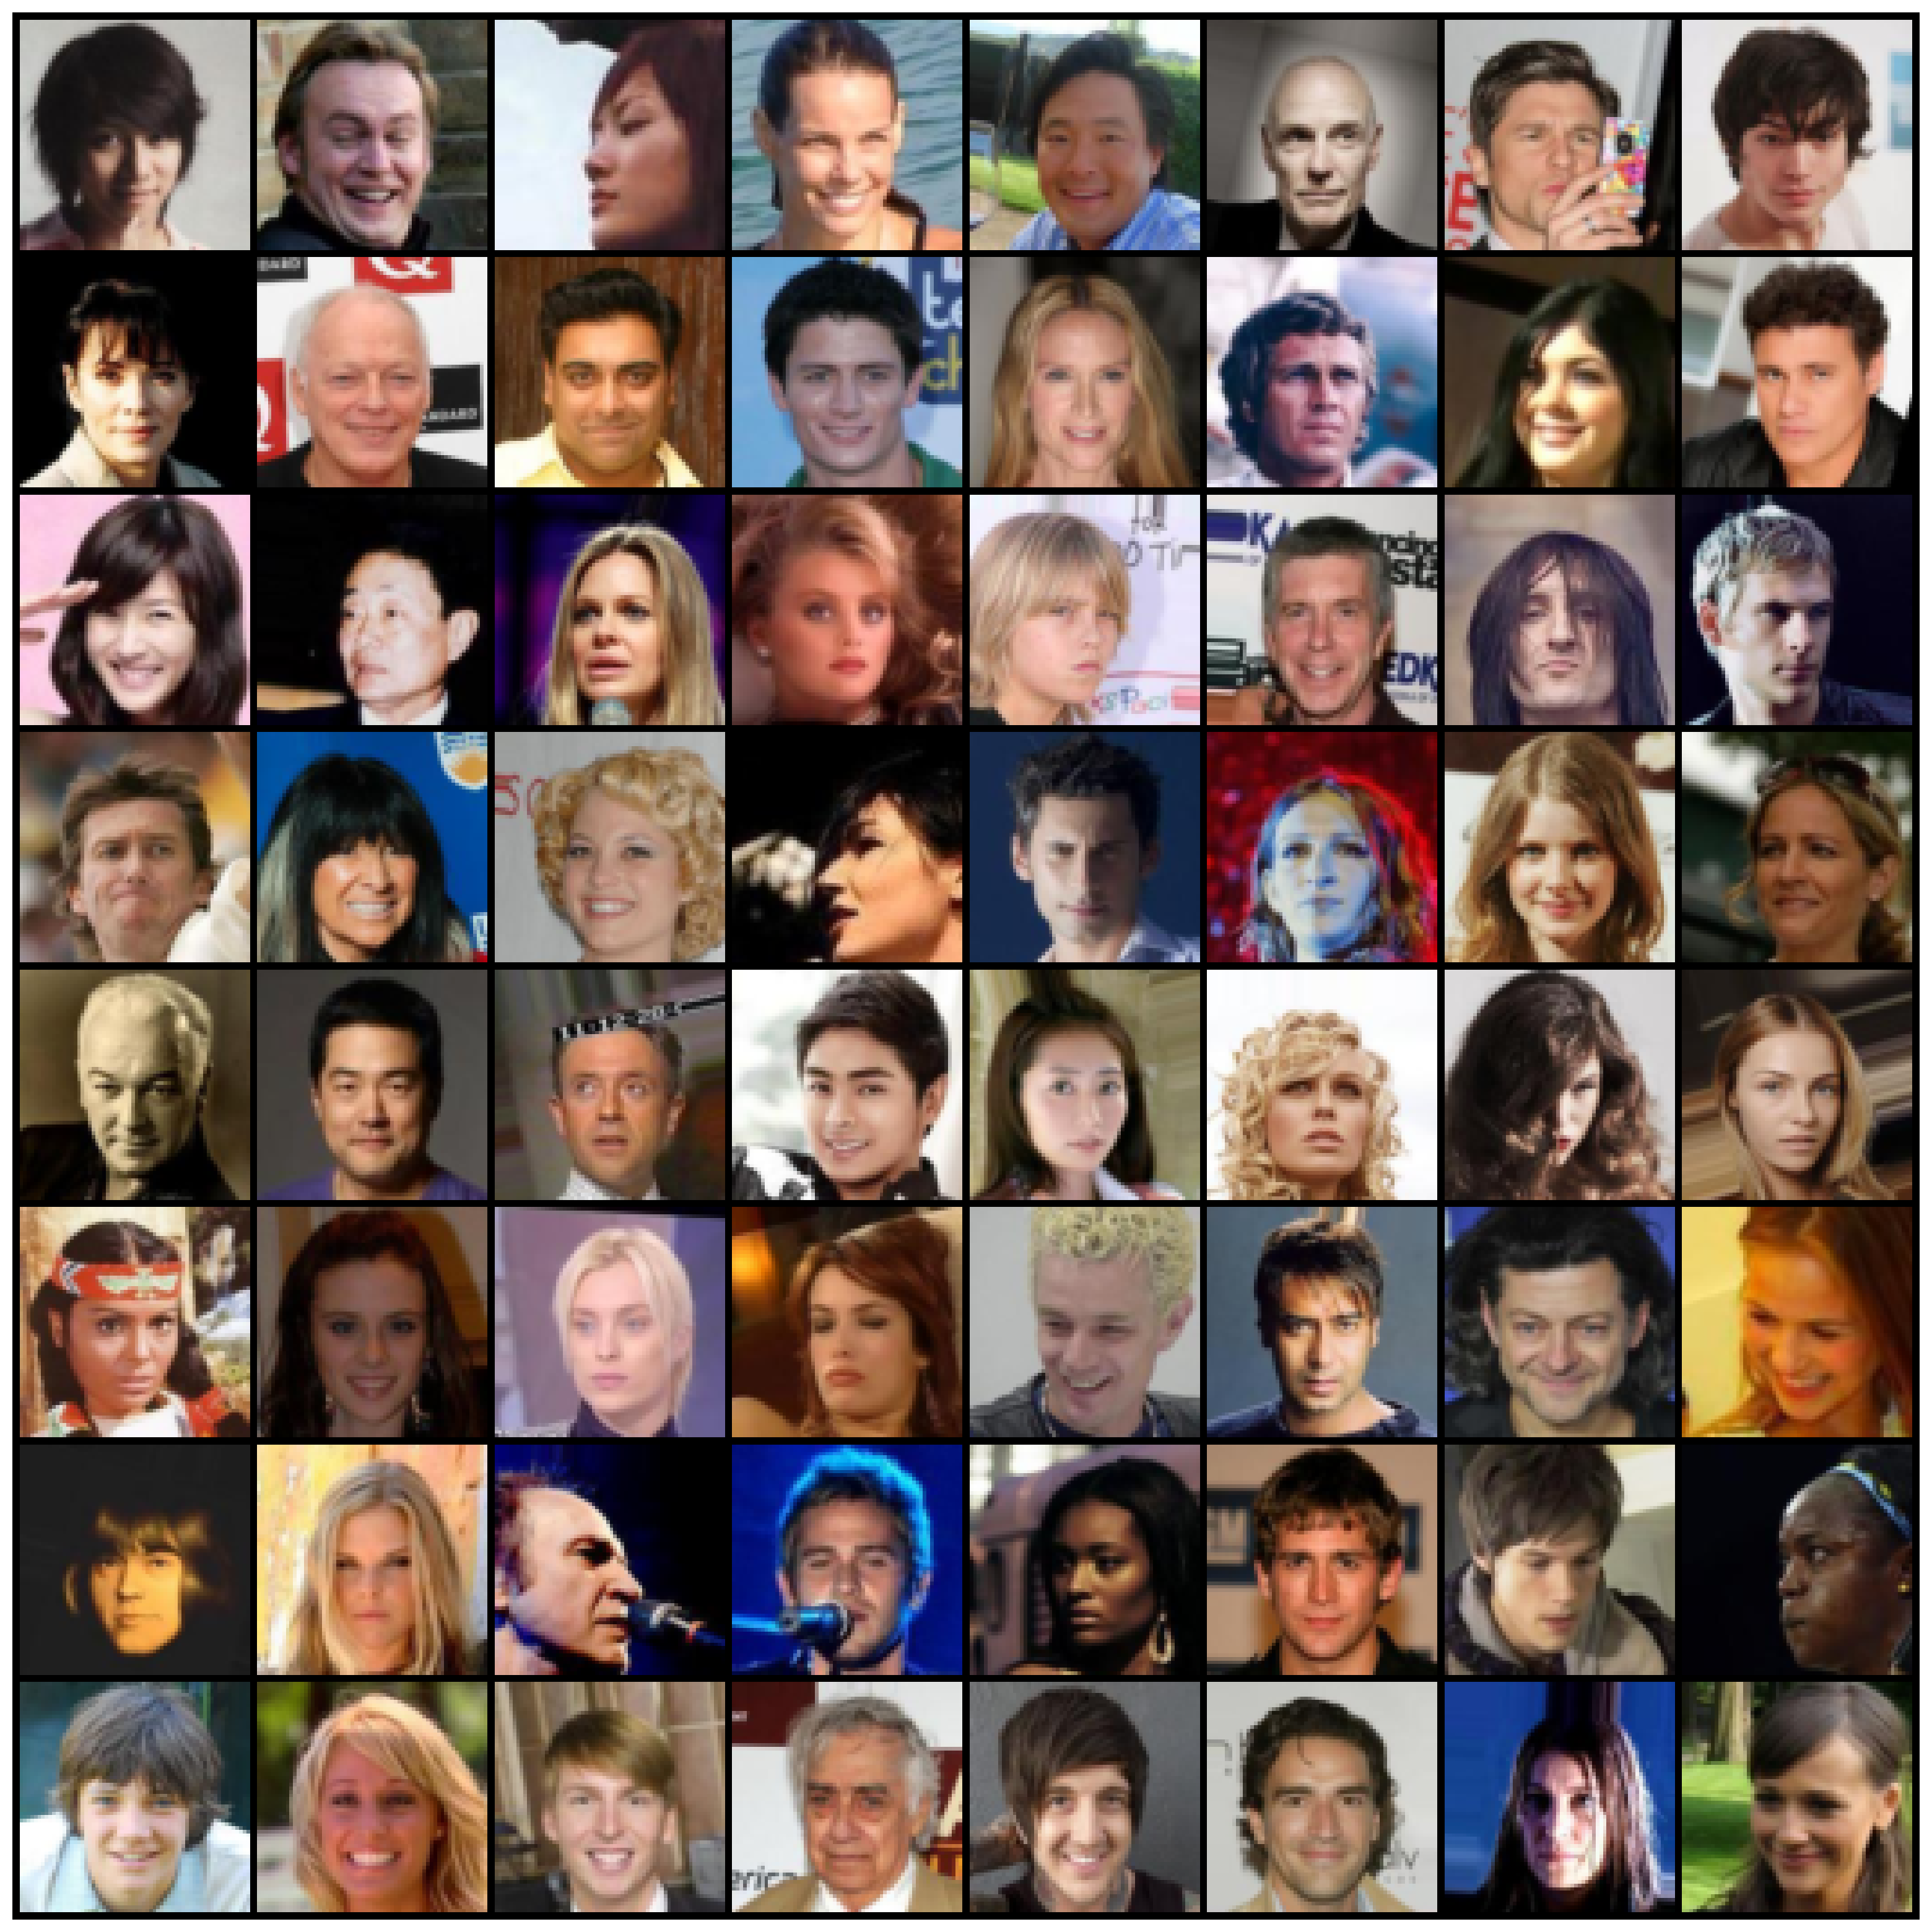

In [17]:
batch = next(iter(dataloader))               # (B,3,H,W) in [-1,1]
imgs = unnormalize(batch).clamp(0, 1)
grid = make_grid(imgs[:64], nrow=8, padding=2).permute(1,2,0).cpu().numpy()
plt.figure(figsize=(20, 20))
plt.imshow(grid)
plt.axis("off")
plt.show()